In [1]:
import pandas as pd
import numpy as np

In [2]:
bigsol_smiles = pd.read_csv("../data/krasnov/bigsoldb_chemprop_nonaq.csv")["solute_smiles"].unique()
solprop_smiles = pd.read_csv("../data/vermeire/solprop_chemprop_nonaq.csv")["solute_smiles"].unique()
leeds_smiles = np.concatenate(
    (pd.read_csv("../data/boobier/leeds_acetone_chemprop.csv")["solute_smiles"].to_numpy(),
    pd.read_csv("../data/boobier/leeds_ethanol_chemprop.csv")["solute_smiles"].to_numpy(),
    pd.read_csv("../data/boobier/leeds_benzene_chemprop.csv")["solute_smiles"].to_numpy(),)
)

In [3]:
combined = np.concatenate((bigsol_smiles, solprop_smiles, leeds_smiles))
targets = ["BigSolDB"] * len(bigsol_smiles) + ["SolProp"] * len(solprop_smiles) + ["Leeds"] * len(leeds_smiles)

In [4]:
import chemplot

/home/jackson/miniconda3/envs/chemplot/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


sim_type indicates the similarity type by which the plots are constructed.
The supported similarity types are structural and tailored.
Because a target list has been provided 'tailored' as been selected as sym_type.
For the following SMILES not all descriptors can be computed:
ClP1(Cl)=NP(Cl)(Cl)=NP(Cl)(Cl)=N1
Cl[P]1(=N[P](=N[P](=N[P](=N1)(Cl)Cl)(Cl)Cl)(Cl)Cl)Cl.
These SMILES will be removed from the data.


/home/jackson/miniconda3/envs/chemplot/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/home/jackson/miniconda3/envs/chemplot/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jackson/miniconda3/envs/chemplot/lib/python3.11/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


<Axes: label='scatter', title={'center': 'UMAP plot'}, xlabel='UMAP-1', ylabel='UMAP-2'>

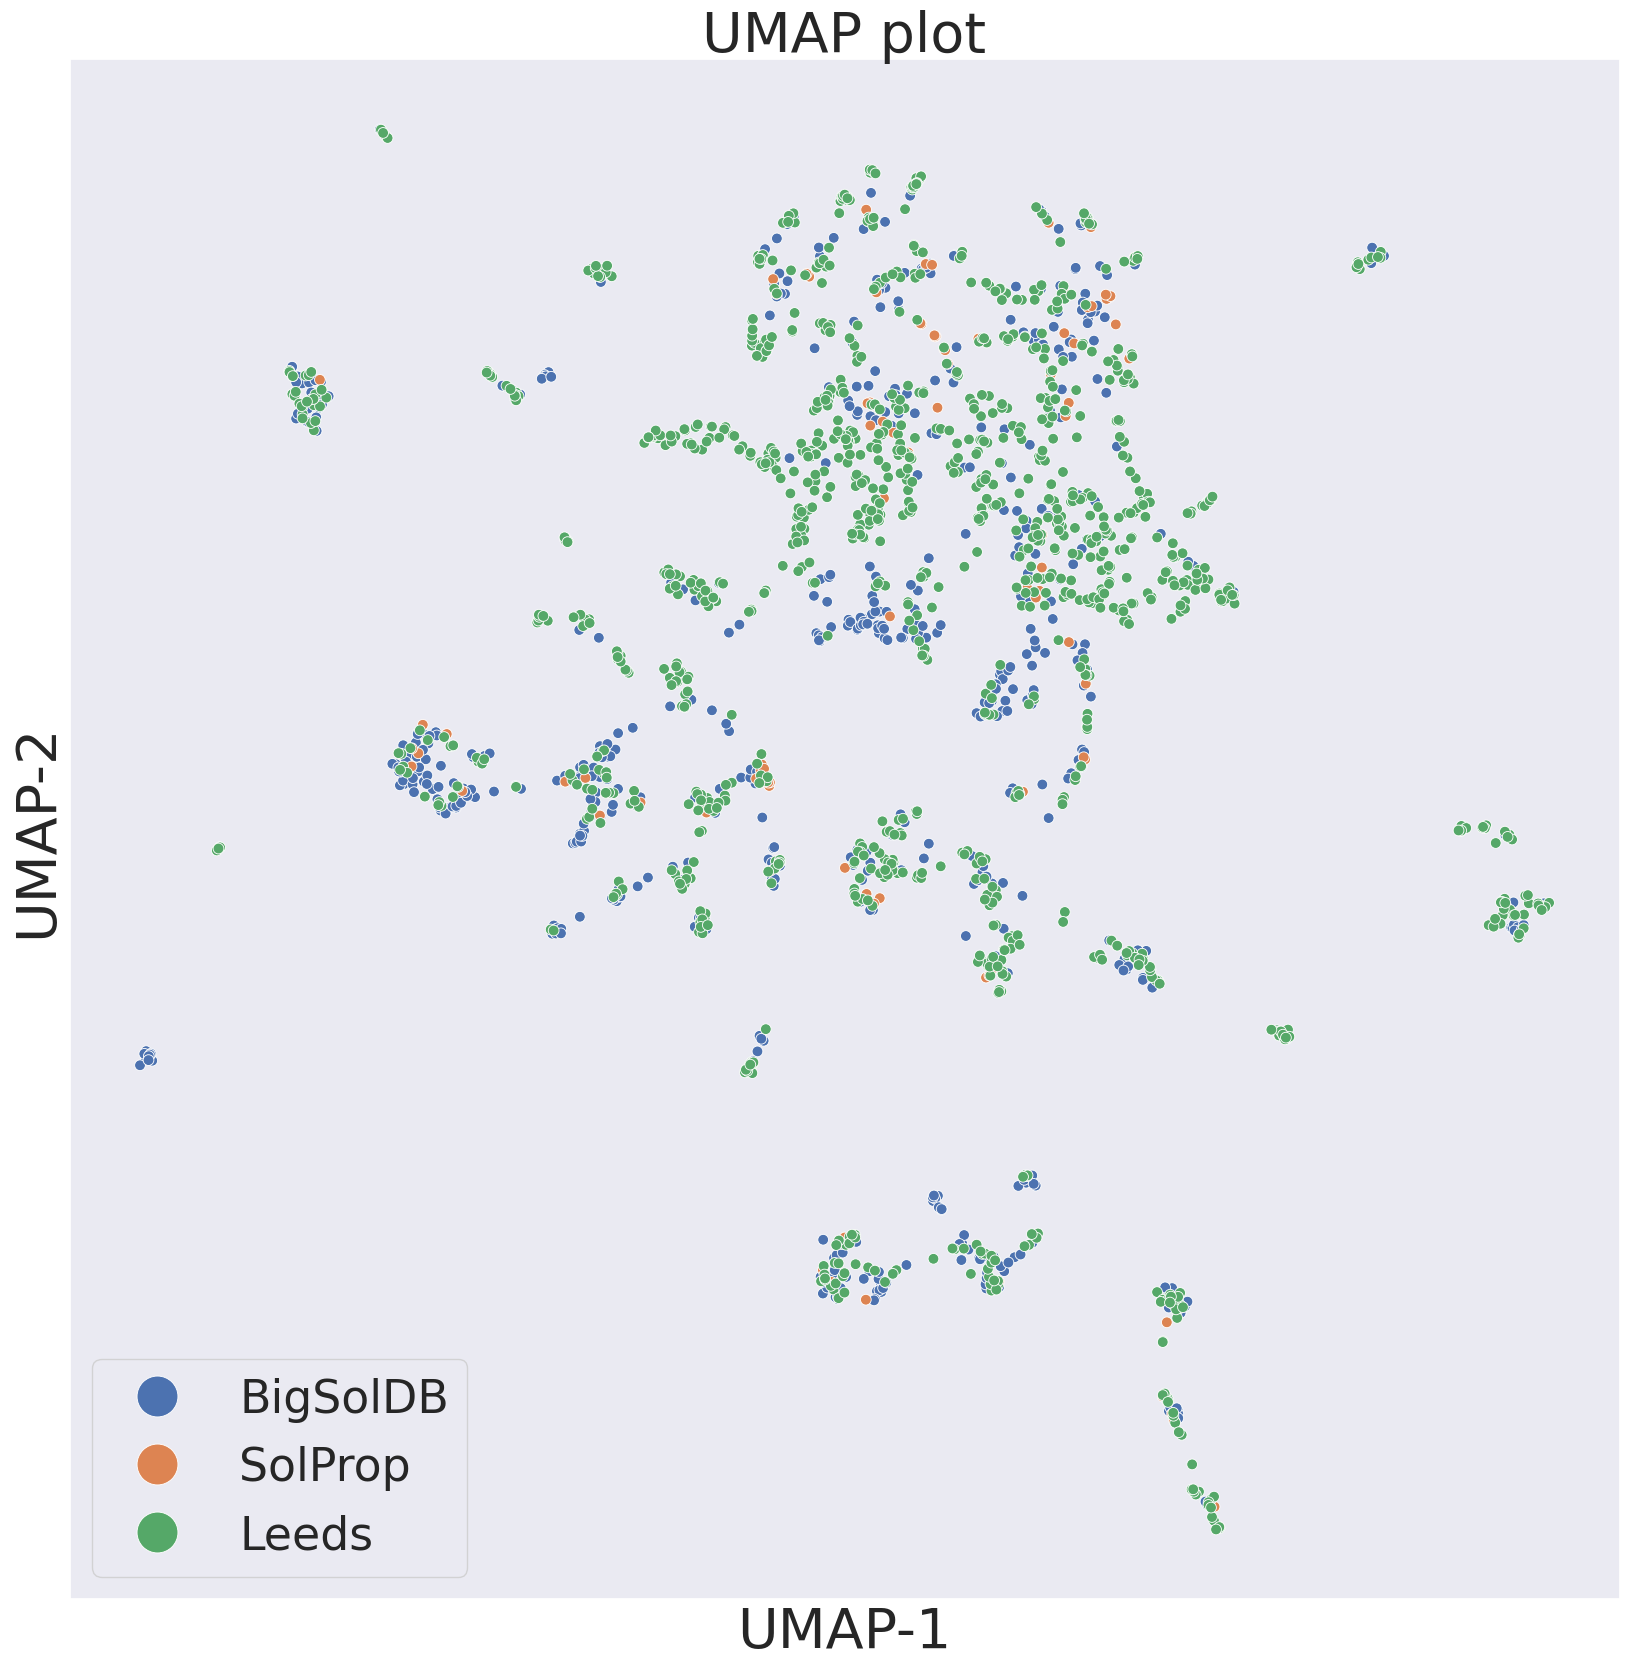

In [ ]:
plotter = chemplot.Plotter.from_smiles(combined, target=targets, target_type="C", sim_type="structural")
plotter.umap()
plotter.visualize_plot()